In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math

plt.rc('font', family='Malgun Gothic')

In [2]:
final_df = pd.read_csv('../data/SEOUL_CLASS_1.csv')
final_df

,상권_코드_명,기준_년_코드,기준_분기_코드,업종_대분류,경영_위기_비율,상권_코드,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,...,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,유사_업종_점포_수,개업률,폐업률
0,DMC(디지털미디어시티),2022,1,외식업,0.150943,2120098,72,24,1285,8846.0,...,20.60,62.10,17.60,87.80,12.40,57.50,42.50,421,4.08,2.04
1,DMC(디지털미디어시티),2022,2,외식업,0.207547,2120098,72,24,1285,8846.0,...,21.00,60.80,18.70,86.40,13.60,56.40,43.80,424,6.08,4.39
2,DMC(디지털미디어시티),2022,3,외식업,0.142857,2120098,72,24,1285,8846.0,...,21.00,61.00,18.00,85.80,14.40,56.40,43.70,426,5.00,4.67
3,DMC(디지털미디어시티),2022,4,외식업,0.291667,2120098,72,24,1285,8846.0,...,20.70,60.40,18.80,83.00,17.00,56.80,43.20,427,6.98,6.64
4,가락시장역,2022,1,외식업,0.235294,2120234,62,3,2694,10268.0,...,15.27,49.73,35.09,77.82,22.27,61.82,38.18,294,2.74,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,홍대입구역(홍대),2022,4,유통업,0.387755,2120103,91,22,4789,9580.0,...,38.74,30.11,31.68,71.47,28.63,43.63,56.37,874,3.14,1.93
664,화곡역,2022,1,서비스업,0.166667,2120120,88,16,2748,927.0,...,21.94,48.25,30.00,81.12,18.94,49.19,50.94,254,1.22,3.27
665,화곡역,2022,2,서비스업,0.473684,2120120,88,16,2748,927.0,...,19.60,46.00,34.33,81.27,18.93,54.93,45.13,258,3.23,1.61
666,화곡역,2022,3,서비스업,0.380952,2120120,88,16,2748,927.0,...,18.20,43.60,38.27,81.40,18.67,52.40,47.87,256,1.21,2.02


In [3]:
cluster0_df = final_df[final_df['클러스터'] == 0].copy()
cluster1_df = final_df[final_df['클러스터'] == 1].copy()
cluster2_df = final_df[final_df['클러스터'] == 2].copy()
cluster3_df = final_df[final_df['클러스터'] == 3].copy()

In [4]:
cluster0_df.drop('클러스터', axis=1, inplace=True)
cluster1_df.drop('클러스터', axis=1, inplace=True)
cluster2_df.drop('클러스터', axis=1, inplace=True)
cluster3_df.drop('클러스터', axis=1, inplace=True)

In [5]:
cluster0_df.columns

Index(['상권_코드_명', '기준_년_코드', '기준_분기_코드', '업종_대분류', '경영_위기_비율', '상권_코드',
       '집객시설_수', '교통_인프라', '총 상주인구 수', '총_직장_인구_수', '총_생활인구_수', '월_평균_소득_금액',
       '연령대_1020_매출_비율', '연령대_3040_매출_비율', '연령대_5060_매출_비율', '주중_매출_비율',
       '주말_매출_비율', '남성_매출_비율', '여성_매출_비율', '유사_업종_점포_수', '개업률', '폐업률'],
      dtype='object')

In [12]:
correlation = cluster0_df[cluster0_df['업종_대분류'] == '서비스업'].corr()['경영_위기_비율']
cf = correlation.to_frame()
cf

C:\Users\Samsung\AppData\Local\Temp\ipykernel_11780\2761221631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cluster0_df[cluster0_df['업종_대분류'] == '서비스업'].corr()['경영_위기_비율']


,경영_위기_비율
기준_년_코드,NaN
기준_분기_코드,0.381463
경영_위기_비율,1.000000
상권_코드,-0.129528
집객시설_수,-0.171106
교통_인프라,-0.111396
총 상주인구 수,-0.202196
총_직장_인구_수,-0.152261
총_생활인구_수,-0.210660
월_평균_소득_금액,-0.136172


<Axes: xlabel='연령대_5060_매출_비율', ylabel='경영_위기_비율'>

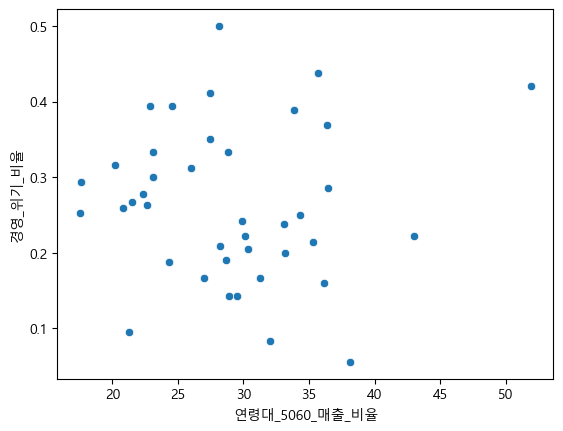

In [24]:
check = cluster0_df[cluster0_df['업종_대분류'] == '서비스업']
sns.scatterplot(x=check['연령대_5060_매출_비율'],y=check['경영_위기_비율'])

In [11]:
correlation = cluster0_df[cluster0_df['업종_대분류'] == '외식업'].corr()['경영_위기_비율']
cf = correlation.to_frame()
cf

C:\Users\Samsung\AppData\Local\Temp\ipykernel_11780\2306792301.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cluster0_df[cluster0_df['업종_대분류'] == '외식업'].corr()['경영_위기_비율']


,경영_위기_비율
기준_년_코드,NaN
기준_분기_코드,0.055262
경영_위기_비율,1.000000
상권_코드,-0.142258
집객시설_수,-0.344742
교통_인프라,-0.074174
총 상주인구 수,-0.140630
총_직장_인구_수,-0.082478
총_생활인구_수,-0.056882
월_평균_소득_금액,-0.156329


In [18]:
correlation = cluster1_df[cluster1_df['업종_대분류'] == '외식업'].corr()['경영_위기_비율']
cf = correlation.to_frame()
cf

C:\Users\Samsung\AppData\Local\Temp\ipykernel_11780\4038577968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cluster1_df[cluster1_df['업종_대분류'] == '외식업'].corr()['경영_위기_비율']


,경영_위기_비율
기준_년_코드,NaN
기준_분기_코드,-0.033413
경영_위기_비율,1.000000
상권_코드,0.090261
집객시설_수,0.043214
교통_인프라,0.006592
총 상주인구 수,0.001547
총_직장_인구_수,0.006408
총_생활인구_수,0.011825
월_평균_소득_금액,-0.102169


In [19]:
correlation = cluster1_df[cluster1_df['업종_대분류'] == '유통업'].corr()['경영_위기_비율']
cf = correlation.to_frame()
cf

C:\Users\Samsung\AppData\Local\Temp\ipykernel_11780\4001272955.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cluster1_df[cluster1_df['업종_대분류'] == '유통업'].corr()['경영_위기_비율']


,경영_위기_비율
기준_년_코드,NaN
기준_분기_코드,0.423580
경영_위기_비율,1.000000
상권_코드,0.217711
집객시설_수,0.227520
교통_인프라,-0.044942
총 상주인구 수,0.059818
총_직장_인구_수,-0.178315
총_생활인구_수,0.083439
월_평균_소득_금액,0.071989


In [20]:
correlation = cluster2_df[cluster2_df['업종_대분류'] == '서비스업'].corr()['경영_위기_비율']
cf = correlation.to_frame()
cf

C:\Users\Samsung\AppData\Local\Temp\ipykernel_11780\3027106538.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cluster2_df[cluster2_df['업종_대분류'] == '서비스업'].corr()['경영_위기_비율']


,경영_위기_비율
기준_년_코드,NaN
기준_분기_코드,0.346750
경영_위기_비율,1.000000
상권_코드,0.061487
집객시설_수,-0.047554
교통_인프라,-0.141808
총 상주인구 수,0.253544
총_직장_인구_수,-0.043052
총_생활인구_수,0.248647
월_평균_소득_금액,0.093057


In [21]:
correlation = cluster2_df[cluster2_df['업종_대분류'] == '외식업'].corr()['경영_위기_비율']
cf = correlation.to_frame()
cf

C:\Users\Samsung\AppData\Local\Temp\ipykernel_11780\2767007944.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cluster2_df[cluster2_df['업종_대분류'] == '외식업'].corr()['경영_위기_비율']


,경영_위기_비율
기준_년_코드,NaN
기준_분기_코드,0.093825
경영_위기_비율,1.000000
상권_코드,-0.181324
집객시설_수,-0.119674
교통_인프라,0.104545
총 상주인구 수,-0.009718
총_직장_인구_수,-0.074545
총_생활인구_수,0.140276
월_평균_소득_금액,0.106362
